# Bootcamp I Notebook

In [1]:
""""" 
Im sorry that Jaume and I picked up a rather quick pace during the bootcamp
We hope this commentary would enable you to understand this python script better
Please do not hesitate to email machinelearning@lsesu.org should you have any problems
Anyways, lets begin writing our code

For the very first step, we download the libraries relevant to our task.
The symbol "!" informs python that such function is to be called out from terminal /command line
"""""
! pip3 install numpy
! pip3 install pandas
! pip3 install matplotlib
! pip3 install sklearn

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import grid_search

You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/KK/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Data Exploring

In [3]:
"""""
We name our dataset as "data" and call out the read_csv() function from our pandas package
The input in the pd.read() function is your fil e path
P.S. Remember to add in quotational marks to denote your path as a string!
"""""
data = pd.read_csv('Data/data_train.csv')

In [4]:
os.getcwd()

'/Users/KK/Documents/LSE/Personal-Projects'

In [5]:
"""""
Now we check the shape of our data. You will realize this dataset is a (6000 x 786) matrix
This means we have 6000 samples and 784 variables in our dataset (note 28*28 = 784!)
"""""
data.shape

(60000, 786)

In [7]:
"""""
The head() function shows users the first few rows of their dataset
This enables users to understand how the dataset is structured
"""""

data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


Note that:
1. We have 60000 images
2. Images are 28*28
3. We have a column with the labels: 0,1,2,3,...,9

In [6]:
"""""
Instead of having an additional index column, we replace it using the first column of our dataset
Note that in Python, it uses 0 indexing format, meaning it counts from 0 instead of 1.
Hence here, data.columns[0] denotes the first column of our dataset
"""""
data = data.set_index(data.columns[0])

In [7]:
"""""
As expected, once we replace the index with one column, the number of columns reduces from 786 to 785
"""""
data.shape

(60000, 785)

In [8]:
# we will only use 5000 rows of the data
sample = data.sample(frac=0.10)

In [9]:
"""""
The iloc[] command enables us to extract a subset within our dataset
sample.iloc[:,:-1] means we extract all rows and all columns (except for the last one!) of the dataset
sample.iloc[:,-1] ? Well you can easily guess it. This means we extract all rows and only the last column
For econometricians / statisticians, you can think about the last column as "y" and all other columns being the feature
set "X"
"""""
# separate images and labels
images = sample.iloc[:,:-1]
labels = sample.iloc[:,-1]

In [10]:
"""""
Again, the head function allows you to glimpse through your dataset
"""""
images.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
6007,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45392,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39287,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
"""""
def f(): is the basic format of defining our own function in Python. I will not go through the function here
as it as not particularly relevant to ML. This function simply allows you to visualize your data
"""""
def show_digit(image):
    """Image: (784,1) np array
    """
    
    digit = image.reshape(28,28)
    plt.imshow(digit, cmap='gray')
    plt.show()

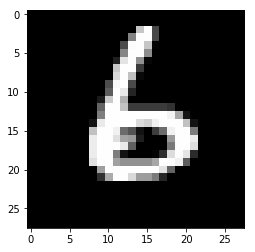

Label: 6


In [13]:
# look up digit
num = 12
show_digit(images.values[num,:])
print('Label: ' + str(labels.values[num]))

## Preparing the Data for Training

SVMs are a linear programming model so we need to:

1. Have the training data in Matrix Format
2. Separate the training set into validation and training

In [14]:
"""""
Now we define our X (feature set) and y (outcome)
We use images.values instead of images to drop the index
"""""
X = images.values
y = labels.values

In [15]:
"""""
Again, we review the shape of our matrix. Unsurprisingly, X has 784 columns (x1,x2...,x784) 
and y has only one column (a vector)
"""""
X.shape, y.shape 

((6000, 784), (6000,))

In [16]:
"""""
In the very beginning of this script, we imported the function "train_test_split()" from sklearn.model_selection
As we emphasized during the bootcamp, these packages have built in functions that could facilitate our analysis
and we don't necessarily have to define our own function tediously

To reiterate, in Machine Learning, we are concerned about Out-of-Sample predictions. Hence, we partition our dataset
into train data and test data. (I tend to think of this as "pretending" that the test data is unseen data)
"""""
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [17]:
"""""
You should know by now what the shape function does
"""""
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((4800, 784), (1200, 784), (4800,), (1200,))

Idea:

1. Train the model on the training set
2. Hypertune the SVM parameters on the validation set

## Model: SVM

In [18]:
"""""
Here we select our model as SVC. There are many other models other than the support vector classifier within sklearn
such as RandomForestClassifier()/ linear_model.lasso etc. Who knows, maybe you can learn about these alternative models
in our second bootcamp ;)

We also need to choose the kernel (Think of this as the shape of the decision boundary). Other kernels we discussed 
during the bootcamp includes Gaussian(RBF), polynomial boundaries etc. Feel free to try them out yourself by inputting
model = SVC(kernel = 'poly',degree=2) or model = SVC()    --> The default kernel is the Gaussian kernel

"""""
model = SVC(kernel='linear')

In [19]:
"""""
The fit function simply fits your model with your data. Again, we only fit our training data as we pretend that 
it is the only available dataset. We will later on apply this model to our test data to compute the model's accuracy
"""""
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
"""""
This helps you find the coefficients of the model and the support vectors of the SVC
"""""

coefs = model.dual_coef_
supports = model.support_vectors_

In [21]:
coefs.shape, supports.shape

((9, 1683), (1683, 784))

In the 784 dimensional space, the support vectors are the data points that generate a 1 vs 1 hyperplane to separate a ovservations of 2 classes

In [22]:
"""""
This function shows you the prediction output (yval_predicted) corresponding to your testing Xval
"""""
def train(m, Xtrain, ytrain, Xval):
    """ model: sklearn model
    """
    m.fit(Xtrain, ytrain)
    predictions = m.predict(Xval)
    return predictions

In [23]:
pred = train(SVC(kernel='linear'), X_train, y_train, X_val)

In [24]:
"""""
Show the prediction results
"""""
pred

array([6, 7, 3, ..., 7, 4, 7])

In [25]:
"""""
In sklearn.metrics, there exists a built in function that compares your predicted results with true results
It will display the % of correct predictions
"""""
accuracy_score(pred, y_val)

0.91583333333333339

[[107   0   1   0   1   0   0   0   0   1]
 [  0 150   0   1   1   1   0   1   4   1]
 [  1   1  92   3   1   3   2   2   4   0]
 [  1   0   2 113   0   3   0   0   7   3]
 [  0   0   2   0 126   1   1   1   0   6]
 [  0   0   1   4   0  81   2   0   4   0]
 [  0   0   1   0   0   3 106   0   0   0]
 [  0   0   1   0   0   0   0 122   0   5]
 [  2   0   3   3   0   1   1   0 102   1]
 [  0   0   0   2   6   0   0   5   0 100]]


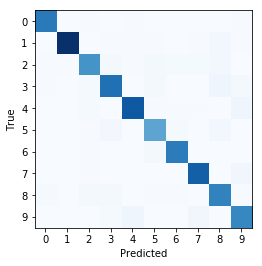

In [26]:
"""""
confusion_matrix is also a built in function within sklearn
The diagonal of the matrix shows the number of observations predicted correctly within a particular class (digits)

"""""
cm = confusion_matrix(pred, y_val)
print(cm)

"""""
The following is simply a fancier way present the confusion matrix
it may make things slightly more confusing (Pun intended) so I will not go through the steps
"""""
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('True')
ticks = np.arange(10)
plt.xticks(ticks)
plt.yticks(ticks)
plt.show()

### Hypertuning and CV
Improve the accuracy of our model without overfitting. We can do 2 things:

1. Choose what type of regularization to use
2. Hypertune model complexity

In [27]:
"""""
As mentioned during the bootcamp. Most pannel data is not linearly separable and even if they are, fitting a 
hard margin may not necessarily yield the best results (Remember Bias Variance Trade-off!)

Intuition: The hard margin hyperplane could change dramatically if you select a different sample from the same 
population. This means your model will have an extremely high variance!

To reconcile this, we allow for some slacks in our classification, meaning some data points will be misclassified
but this could reduce our model's variance dramatically

In our SVC function, C denotes the amount of "slack" you allow for. The higher the value of C, the more lineant 
your model is

Notice previously, we simply typed in SVC(kernel='linear') without actually keying in C. Sklearn defaults
C as 1 if you do not manually type in C.
"""""
pred = train(SVC(kernel='linear', C=0.000000001), X_train, y_train, X_val)

In [28]:
"""""
As you can expect, if you set C = 0.00000001 (meaning you're a jackass who doesn't allow for much error), the
prediction result would be significant lower due to the model's high variance
"""""
accuracy_score(pred, y_val)

0.33833333333333332

In [29]:
"""""
Here, we call out the logspace function from our numpy library
There are 3 key arguments in this function. 
The 1st is your starting value of the sequence, 2nd is the final value of the sequence, and 3rd is the number
of samples to generate

So we generate an array containing 20 numbers ranging from 10^-10 to 10^4 spaced evenly
"""""
log_C = np.logspace(-10,4, 20)
print(log_C)

[  1.00000000e-10   5.45559478e-10   2.97635144e-09   1.62377674e-08
   8.85866790e-08   4.83293024e-07   2.63665090e-06   1.43844989e-05
   7.84759970e-05   4.28133240e-04   2.33572147e-03   1.27427499e-02
   6.95192796e-02   3.79269019e-01   2.06913808e+00   1.12883789e+01
   6.15848211e+01   3.35981829e+02   1.83298071e+03   1.00000000e+04]


In [30]:
"""""
Here, we introduce the for loop
The for loop is an essential tool in Python that enables you to iterate the same process on different objects
continuously

In this loop, we show our accuracy score corresponding to different values of C we generated previously using the 
logspace() function

"""""

accs = []
for c in log_C:
    prd = train(LinearSVC(C=c), X_train, y_train, X_val)
    acc = accuracy_score(prd, y_val)
    accs.append(acc)

In [31]:
print(accs)

[0.74916666666666665, 0.79333333333333333, 0.84999999999999998, 0.8783333333333333, 0.89500000000000002, 0.90000000000000002, 0.88500000000000001, 0.87666666666666671, 0.8666666666666667, 0.85166666666666668, 0.84583333333333333, 0.84999999999999998, 0.84750000000000003, 0.84666666666666668, 0.84916666666666663, 0.85333333333333339, 0.84999999999999998, 0.85250000000000004, 0.84416666666666662, 0.84583333333333333]


In [32]:
"""""
Among the accs list, we choose the c that yields the highest accuracy score and define it as best_C
"""""
best_C = log_C[np.argmax(accs)]

In [33]:
best_C 

4.832930238571752e-07

In [34]:
"""""
Knowing our optimal C, we can train our SVC model again using C = best_C
"""""

prd = train(SVC(kernel='linear', C=best_C), X_train, y_train, X_val)

In [35]:
"""""
Comparing the results here, you should (hopefully) get a higher accuracy score!
"""""
accuracy_score(prd, y_val)

0.9291666666666667

In [36]:
"""""
We use the cross-validation score to evaluate whether this is the best model
np.concatenate() simply concatenates your X_train and X_val datasets
"""""
scores = cross_val_score(SVC(kernel='linear', C=best_C), np.concatenate([X_train, 
    X_val]), np.concatenate([y_train, y_val]), cv=5)

In [37]:
scores, scores.mean()

(array([ 0.91347754,  0.91347754,  0.91666667,  0.91916667,  0.92558528]),
 0.9176747384978956)

### Visualizing the Complexity tradeoff

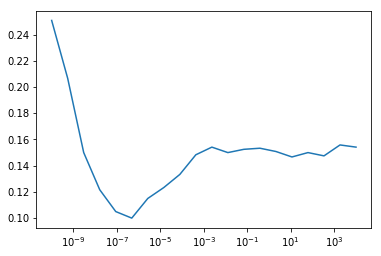

In [38]:
"""""
Visualizing the complexity tradeoff
Here we define errors as 1 - x for x in accs (the list containing accuracy score corresponsing to different Cs)
because error = 1 - accuracy
We use the "C" which yields the lowest Mean-Squared-Error (global minima of this graph)
"""""

errors = [1.0 - x for x in accs]
plt.plot(log_C, errors)
plt.xscale('log')
plt.show()

### Using GridSearch Cross Validation

In [39]:
parameters = {'C':log_C}
model = grid_search.GridSearchCV(SVC(kernel='linear'), parameters)
model.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-10,   5.45559e-10,   2.97635e-09,   1.62378e-08,
         8.85867e-08,   4.83293e-07,   2.63665e-06,   1.43845e-05,
         7.84760e-05,   4.28133e-04,   2.33572e-03,   1.27427e-02,
         6.95193e-02,   3.79269e-01,   2.06914e+00,   1.12884e+01,
         6.15848e+01,   3.35982e+02,   1.83298e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [40]:
# what is the best model?
print(model.best_estimator_)

SVC(C=4.832930238571752e-07, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
